## Task: Build a machine learning model to identify fraudulent credit card transactions.
- Preprocess and normalize the transaction data, handle class imbalance issues, and split the dataset into training and testing sets.
- Train a classification algorithm, to classify transactions as fraudulent or genuine.
- Evaluate the model's performance using metrics 

In [1]:
# Importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt                       ## For plotting graphs
import seaborn as sns                                 ## Data Visualization Library
from datetime import timedelta
from scipy.stats import pointbiserialr
from sklearn.preprocessing import StandardScaler      ## Library for standardizing the features (scaling)
from sklearn.model_selection import train_test_split  ## For splitting the dataset into training and test sets
from sklearn.ensemble import RandomForestClassifier   ## For random forest model
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score,auc,precision_recall_curve,accuracy_score,classification_report,average_precision_score ## Performance parameters
from sklearn.preprocessing import PowerTransformer    ## Apply power transformations to the skewed features.
from scipy.stats import boxcox
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, RFE ## Select the top k features and Recursive Feature Elimination
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.model_selection import RandomizedSearchCV ## Using Randomized Hyperparameter tuning
from pycaret.classification import *                  ## Displays the comparison between various models


In [2]:
creditcard=pd.read_csv('Credit_Card.csv') # Credit_Card.csv is read, creditcard will contain original DataFrame

In [3]:
df = pd.DataFrame(creditcard) # Creating a dataframe of the csv file loaded in the creditcard variable
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,...,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Data Preprocessing

In [6]:
## Finding the number of missing values 
missing_values = df.isna().sum().sum()
print("Total Missing Values:", missing_values) # Count the total number of missing values 

Total Missing Values: 0


In [7]:
# Count the total number ofduplicate values 
df.duplicated().sum()

1081

In [8]:
df.shape

(284807, 31)

In [9]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

#### Observation from the dataset: 
- The count of non frauds/genuine: 284315
- The count of frauds: 492

In [10]:
no_fraud_percentage=df['Class'].value_counts()[0]/len(df)*100
fraud_percentage=df['Class'].value_counts()[1]/len(df)*100
print (" The no fraud percentage:", no_fraud_percentage.round(2),"%")
print (" The fraud percentage:", fraud_percentage.round(2),"%")

 The no fraud percentage: 99.83 %
 The fraud percentage: 0.17 %


In [11]:
# Filtering the data as fraud and no fraud
No_Fraud = df[df['Class']==0]
Fraud = df[df['Class']==1]

In [12]:
print('No_Fraud Shape:',No_Fraud.shape)
print('Fraud Shape:', Fraud.shape)

No_Fraud Shape: (284315, 31)
Fraud Shape: (492, 31)


In [13]:
## Description of No_Fraud
pd.concat([No_Fraud.Amount.describe()],  axis=1)

,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


#### Observations:
- High Variability: The standard deviation is quite large (250.11), indicating high variability in transaction amounts.
- Skewed Distribution: The median (22.00) is lower than the mean (88.29), suggesting a right-skewed distribution.
- Outliers: The maximum amount (25,691.16) is significantly far from the upper quartile (77.05), indicating the presence of significant outliers.

In [14]:
## Description of Fraud
pd.concat([Fraud.Amount.describe()],  axis=1)

,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


#### Observations:
- High Variability: The standard deviation is quite large (256.68), indicating high variability in transaction amounts.
- Skewed Distribution: The median (9.25) is significantly lower than the mean (122.21), suggesting a right-skewed distribution
- Outliers: The maximum amount (2125.87) is quite far from the upper quartile (105.89), which indicates the presence of significant outliers.

## Exploratory Data Analysis (EDA)

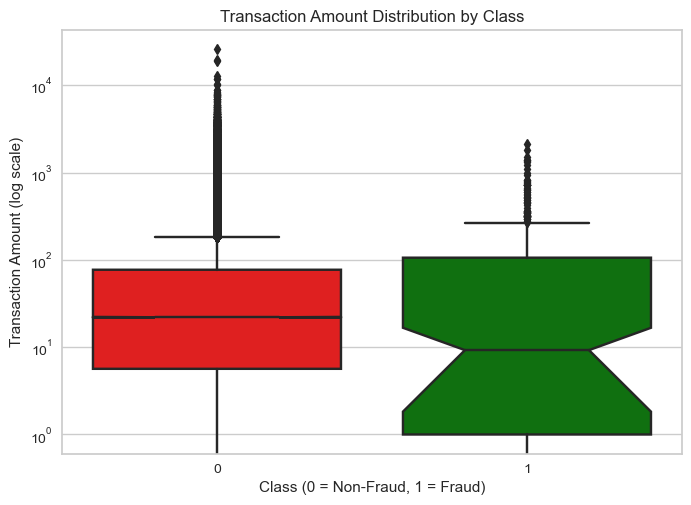

In [15]:
# Create a box plot for amount distribution by class
custom_palette2 = {0: 'red', 1: 'green'}  # Non Fraud is green, Fraud is red
sns.boxplot(x='Class', y='Amount', data=df,notch=True,palette=custom_palette2)
plt.title('Transaction Amount Distribution by Class')
plt.xlabel('Class (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Transaction Amount (log scale)')
plt.yscale('log') 
plt.show()

#### Observations:
- The box plot for non-fraudulent transactions shows a wider spread of data, with the median and the interquartile range indicating a broad range of transaction amounts.
- The box plot for fraudulent transactions is more condensed, showing that fraudulent transactions tend to cluster around lower amounts, but with a significant number of outliers indicating higher transaction amounts.
- Non-fraudulent transactions have a higher median transaction amount compared to fraudulent transactions.
- Non-fraudulent transactions exhibit more variability, with a wider interquartile range compared to fraudulent transactions.

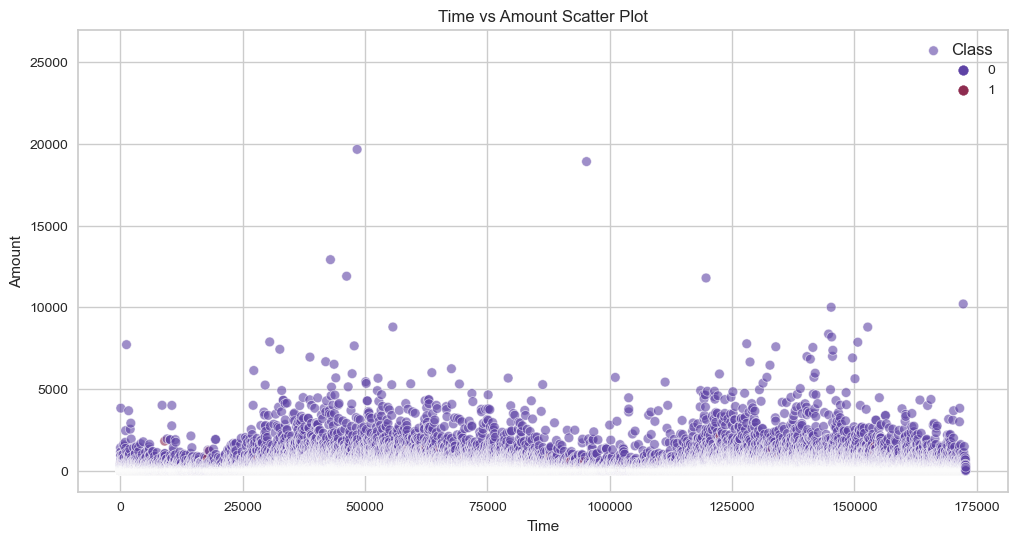

In [16]:
# Time v/s Amount Scatter Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Time', y='Amount', hue='Class', palette='twilight', alpha=0.6)
plt.title('Time vs Amount Scatter Plot')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.legend(title='Class')
plt.show()

#### Observation:
- Both fraudulent and non-fraudulent transactions generally have lower amounts, but the density of non-fraudulent transactions is higher across all amounts.

### Feature Engineering

In [17]:
df['HH:MM:SS'] = df['Time'].apply(lambda X: timedelta(seconds=X)) # Converting the time into hours, minute and seconds format

df[['Hours','Minutes','Seconds']] = df['HH:MM:SS'].dt.components[['hours','minutes','seconds']] # Splitting them into different columns
df.drop(['HH:MM:SS','Seconds'],axis=1,inplace=True) # Dropping rest of the columns, and keeping only minutes and hours

columns = [col for col in df.columns if col != 'Class']
columns.append('Class')
df=df[columns]

df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Hours,Minutes,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0,0,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0,0,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0,0,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0,0,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0,0,0


In [18]:
Fraud = df[df['Class']==1]
pd.concat([Fraud.Hours.describe()],axis=1)

,Hours
count,492.000000
mean,11.646341
std,6.663342
min,0.000000
25%,5.000000
50%,12.000000
75%,17.000000
max,23.000000


#### Observations:
- The average hour for fraudulent transactions is around 11 PM-12 noon
- Fraudulent transactions are spread throughout the day, with a standard deviation of 6.66 hours.
- The 25% of fraudulent transactions happen before 5 AM, while 75% occur before 5 PM.

In [19]:
No_Fraud= df[df['Class']==0]
pd.concat([No_Fraud.Hours.describe()],axis=1)

,Hours
count,284315.000000
mean,14.050623
std,5.833478
min,0.000000
25%,10.000000
50%,15.000000
75%,19.000000
max,23.000000


#### Observations:
- The average hour for non fraudulent transactions is around afternoon (2 PM).
- Non fraudulent transactions are spread throughout the day, with a standard deviation of 5.83 hours.
- The 25% of non fraudulent transactions happen before 10 AM, while 75% occur before 7 PM.

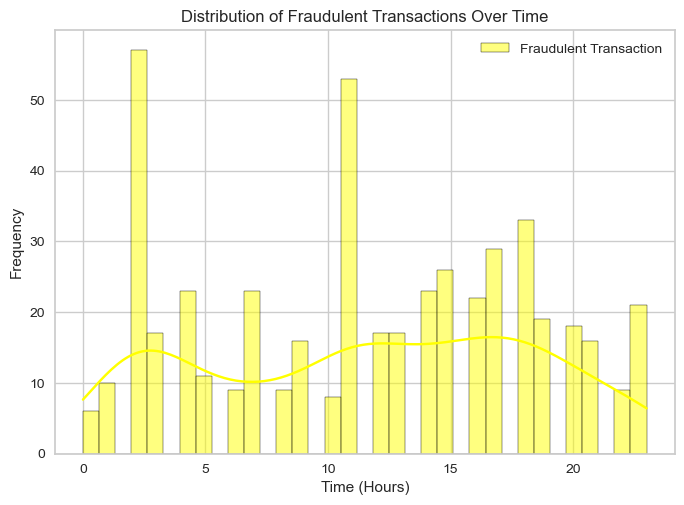

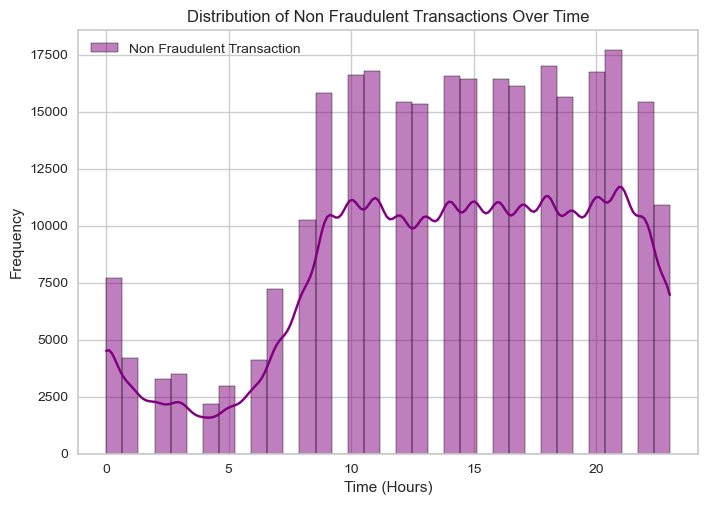

In [20]:
# Distrubution of Fraudulent Transactions over time using a Histogram
sns.histplot(data=df[df.Class == 1], x='Hours', bins=35, kde=True, color='yellow', label='Fraudulent Transaction')
plt.legend()
plt.title('Distribution of Fraudulent Transactions Over Time')
plt.xlabel('Time (Hours)')
plt.ylabel('Frequency')
plt.show()

# Distrubution of Non Fraudulent Transactions over time using a Histogram
sns.histplot(data=df[df.Class == 0], x='Hours', bins=35, kde=True, color='purple', label='Non Fraudulent Transaction')
plt.legend()
plt.title('Distribution of Non Fraudulent Transactions Over Time')
plt.xlabel('Time (Hours)')
plt.ylabel('Frequency')
plt.show()

#### Conclusions:
##### Graph: Distrubution of Fraudulent Transactions over time 
- The highest peak occurs at midnight, with 50+ fraudulent transactions 
- Another notable peak occurs around noon, indicating a secondary surge in fraudulent activities during midday.
- => Hence stricter monitoring and fraud detection measures during these hours.
- The yellow line in the histogram represents a smoothed trend of fraudulent transactions over time.

##### Graph: Distrubution of Non Fraudulent Transactions over time 
- There are consistently high transaction volumes from around 9 AM to 10 PM, suggesting increased activity during standard 
- The transaction frequency is relatively low during the early morning hours (midnight to 5 AM).
- There is a distinct upward trend in transaction volume starting from the early morning (around 5 AM)

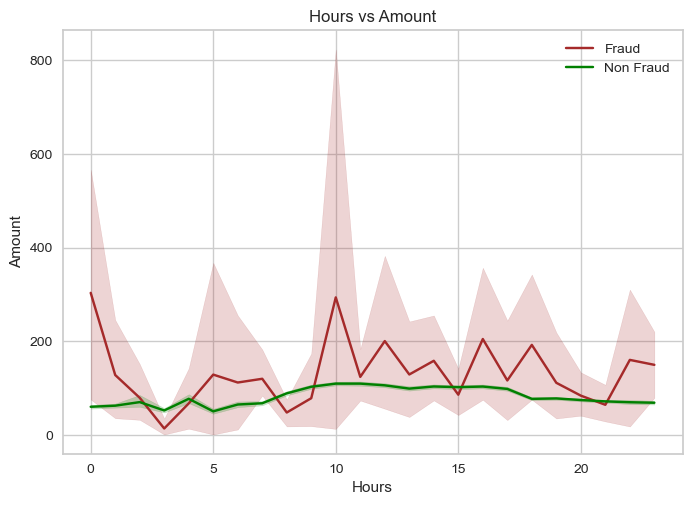

In [21]:
# Plot for Fraudulent transactions (Class == 1)
sns.lineplot(data=df[df['Class'] == 1], color='brown', x='Hours', y='Amount', label='Fraud')

# Plot for Non-fraudulent transactions (Class == 0)
sns.lineplot(data=df[df['Class'] == 0], color='green', x='Hours', y='Amount', label='Non Fraud')

plt.title('Hours vs Amount')
plt.xlabel('Hours')
plt.ylabel('Amount')
plt.legend()
plt.show()

#### Conclusion:
- Peak at Hour 10 AM of  fraudulent transaction indicating a potential high-risk period.
- Outside of the spike, the fraudulent amounts show variability throughout the day but generally stay below 200.
- Increase in genuine transaction amounts started around the 5 AM, peaking around 12 PM, and then gradually decreasing.

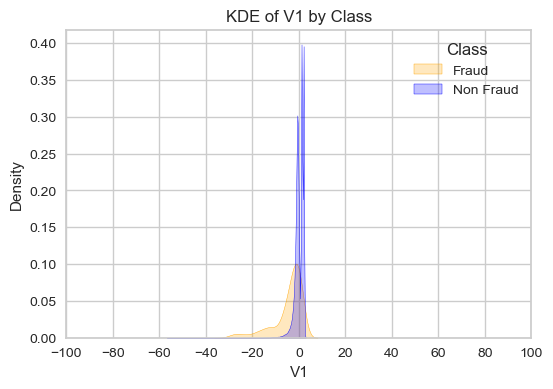

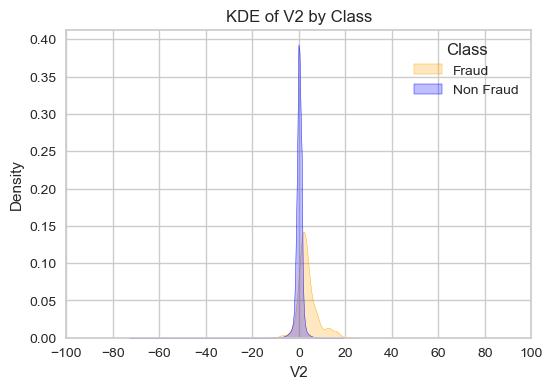

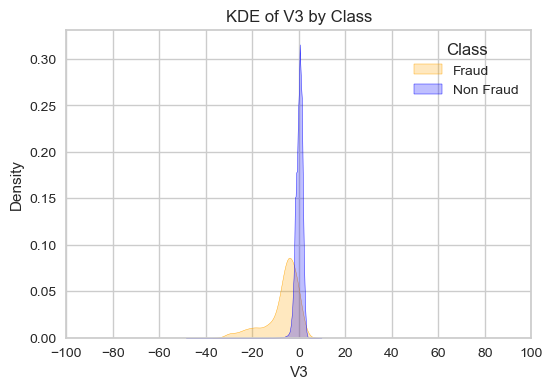

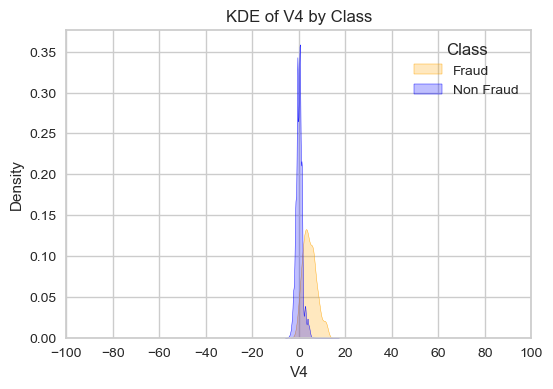

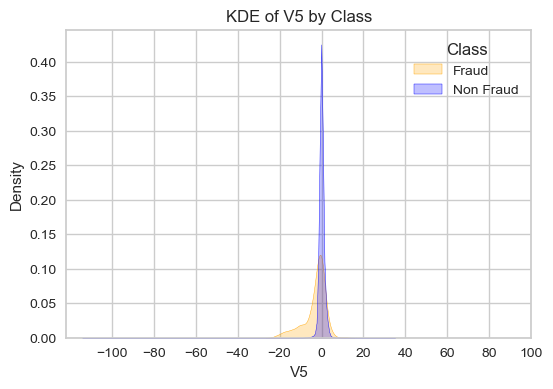

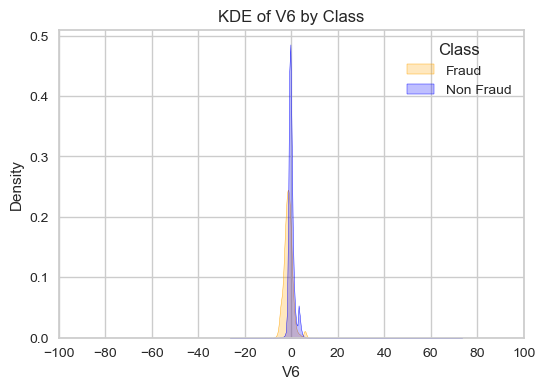

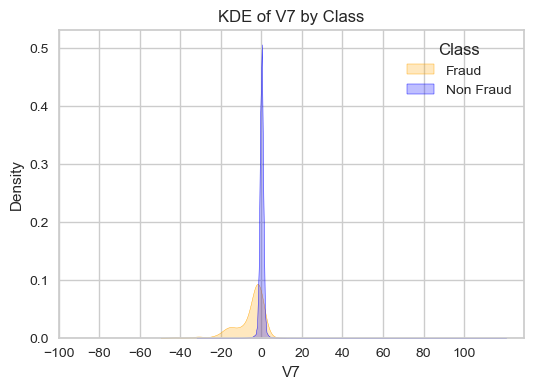

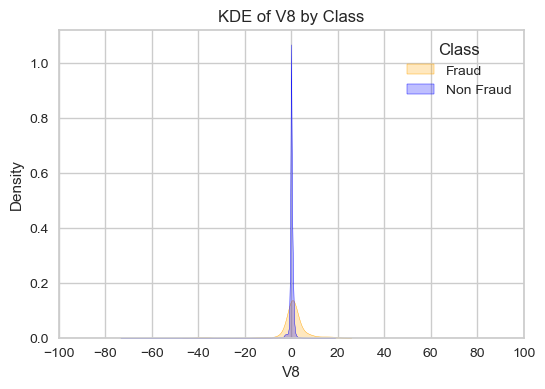

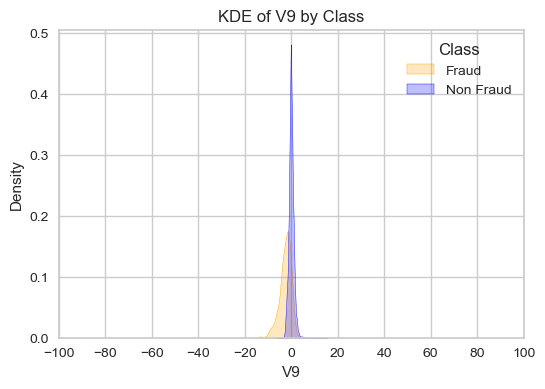

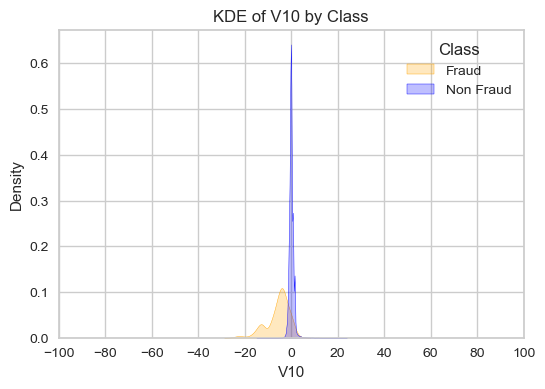

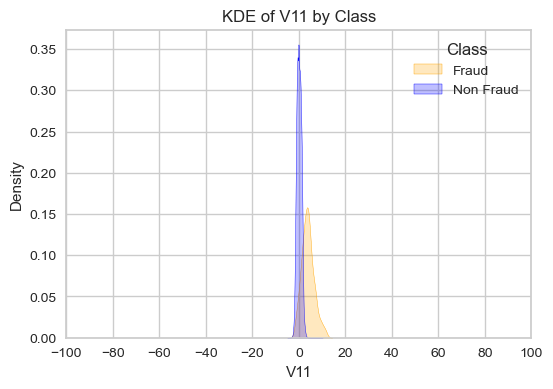

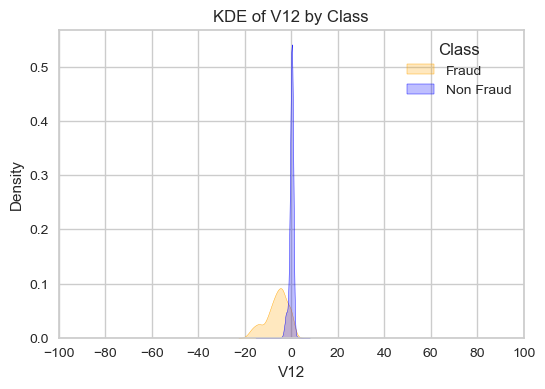

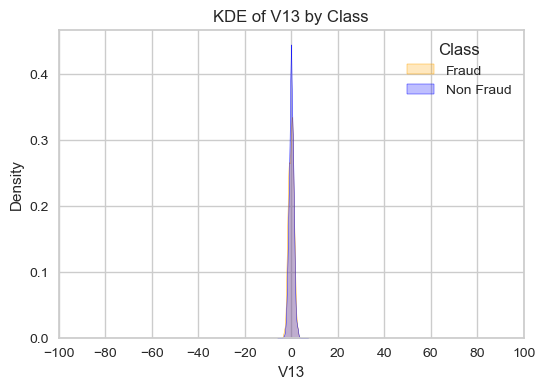

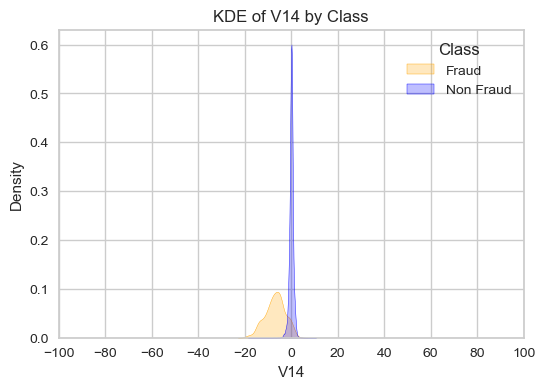

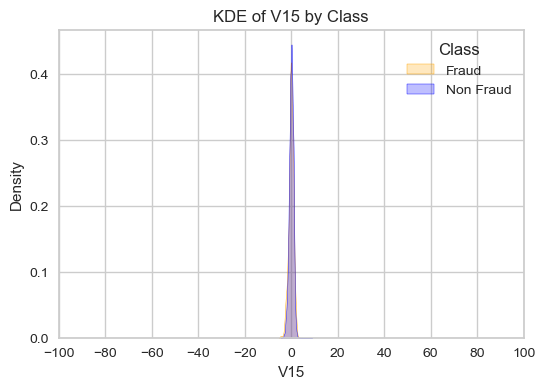

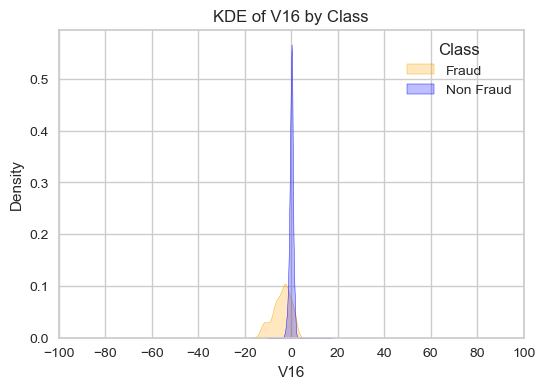

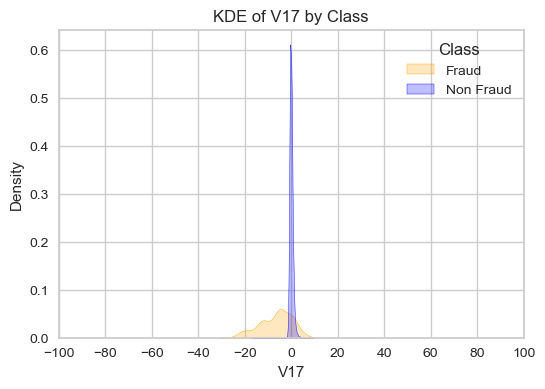

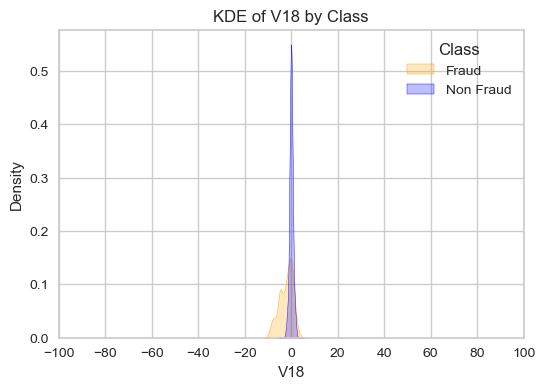

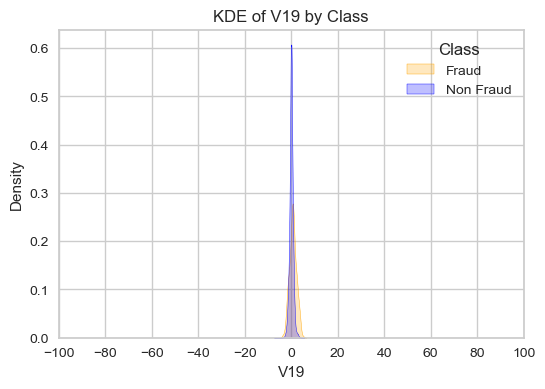

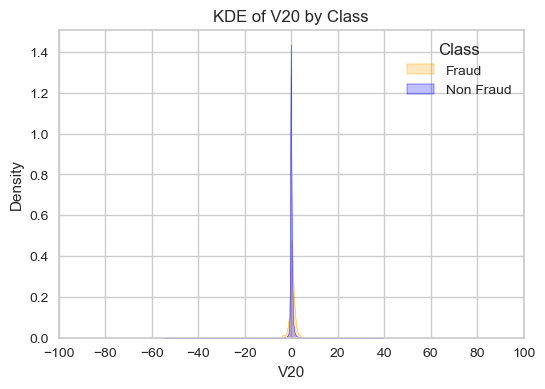

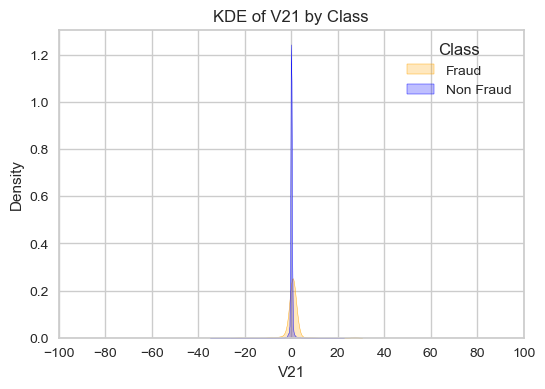

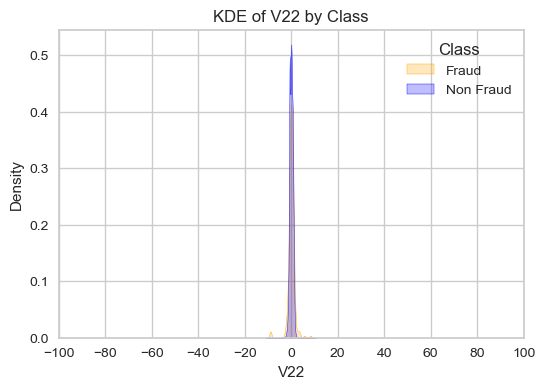

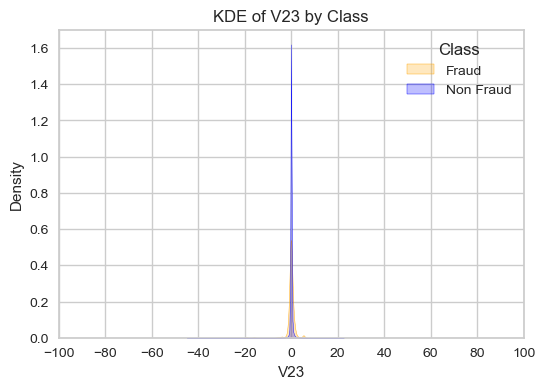

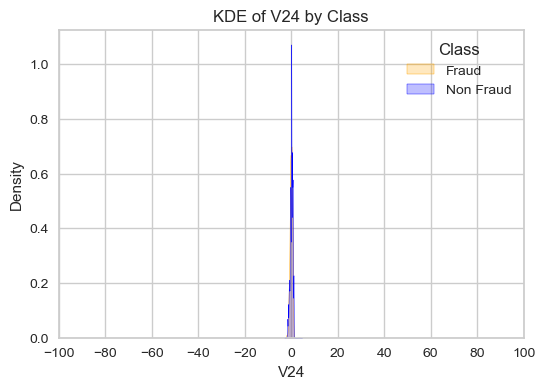

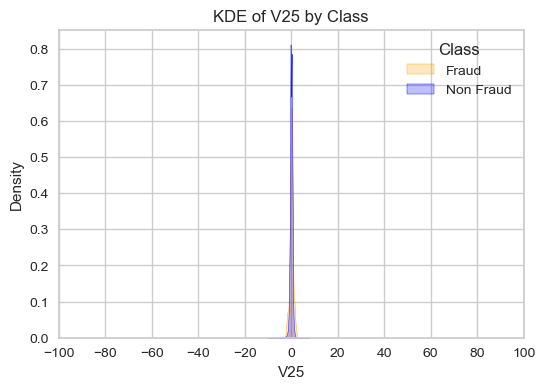

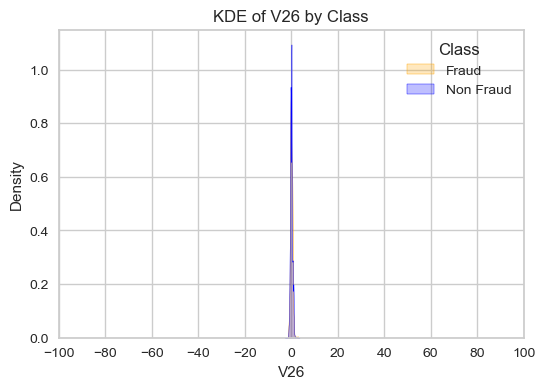

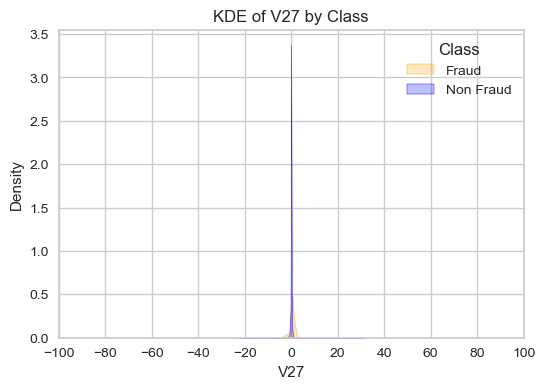

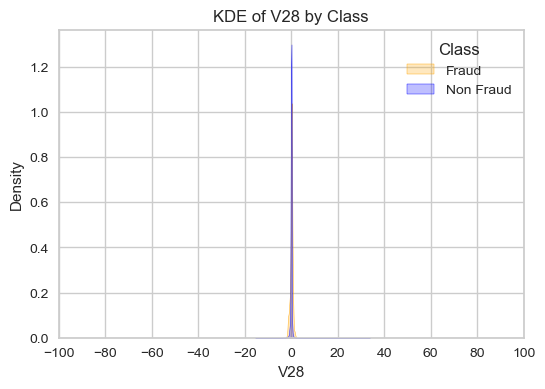

In [22]:
# Kernel Density Estimate (KDE) of each feature
custom_palette1 = {0: 'blue', 1: 'orange'}  # Non Fraud is blue, Fraud is orange
features = [f'V{i}' for i in range(1, 29)]
for feature in features:
    plt.figure(figsize=(6,4))
    sns.kdeplot(data=df, x=feature, hue='Class', shade=True, common_norm=False, palette=custom_palette1)
    plt.title(f'KDE of {feature} by Class')
    plt.xlabel(feature)
    plt.xticks(range(-100,110,20))
    plt.ylabel('Density')
    plt.legend(title='Class', labels=['Fraud', 'Non Fraud'],loc="best")
    plt.show()

#### Observations:
- The distinct separation between the densities of fraudulent and non-fraudulent transactions suggests that  v4,v10,v12,v14,v17,v19 columns have a good discriminative feature for identifying fraud. 
- Higher values of these features should be carefully monitored as they are more likely associated with fraudulent transactions

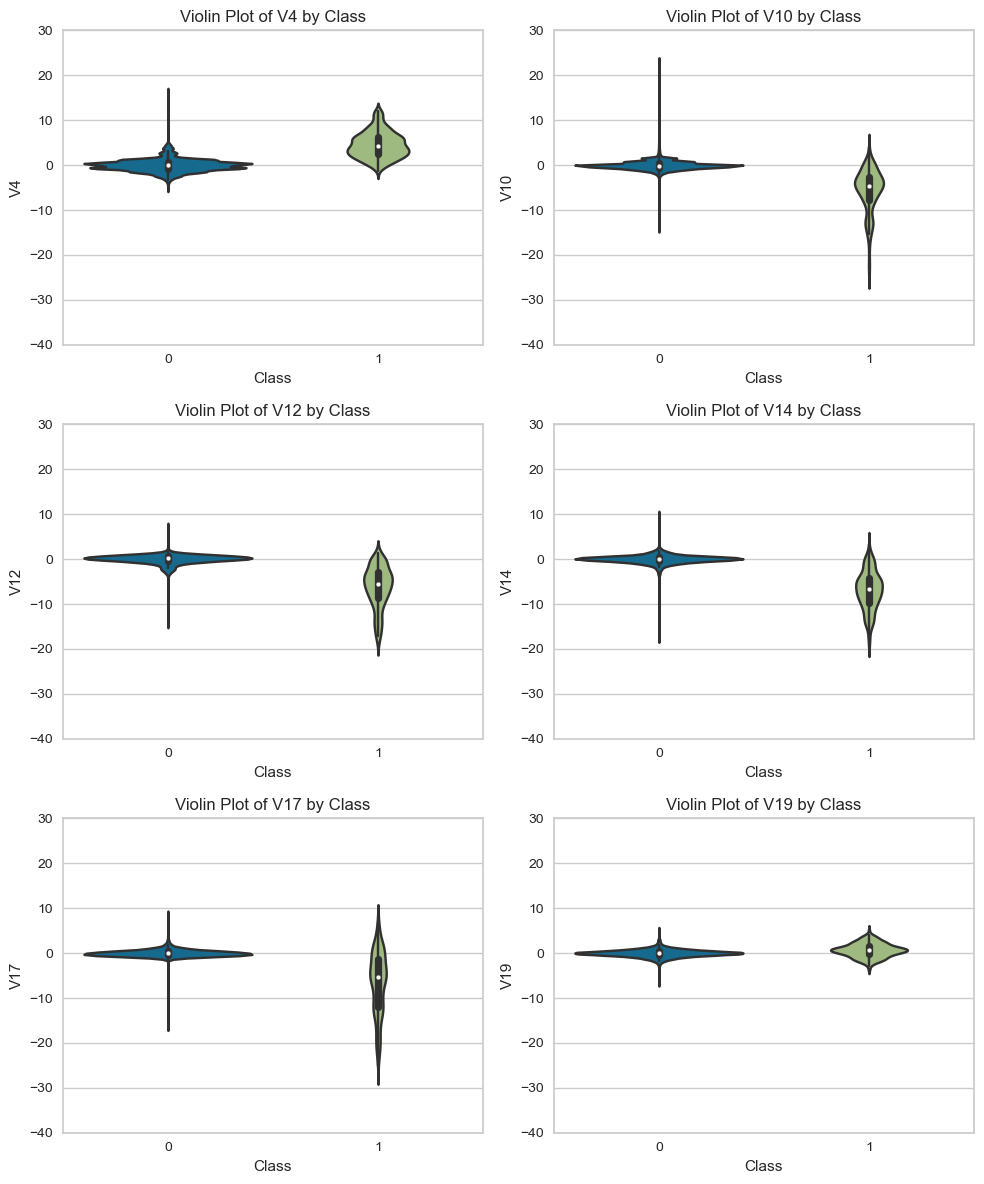

In [23]:
# List of V features, to be filtered
features_filter1=[4,10,12,14,17,19]
v_features = [f'V{i}' for i in features_filter1]

# Violin plots for the filtered features
plt.figure(figsize=(10, 12))
for i, feature in enumerate(v_features):
    plt.subplot(3, 2, i+1)
    sns.violinplot(data=df, x='Class', y=feature)
    plt.yticks(range(-40,40,10))
    plt.title(f'Violin Plot of {feature} by Class')
plt.tight_layout()
plt.show()

   V4:
   - Non-fraudulent transactions are more tightly centered around a lower value.
   - Fraudulent transactions have a wider distribution with a higher central value.
   
   V12:
   - Non-fraudulent transactions have a broad, slightly skewed distribution.
   - Fraudulent transactions are concentrated around a narrower range.

   V19:
   - Non-fraudulent transactions have a broad distribution with multiple peaks.
   - Fraudulent transactions are centered around a different range with a higher concentration.

    The clear distinction in the distributions and difference in distribution shapes make these features very important for    fraud detection

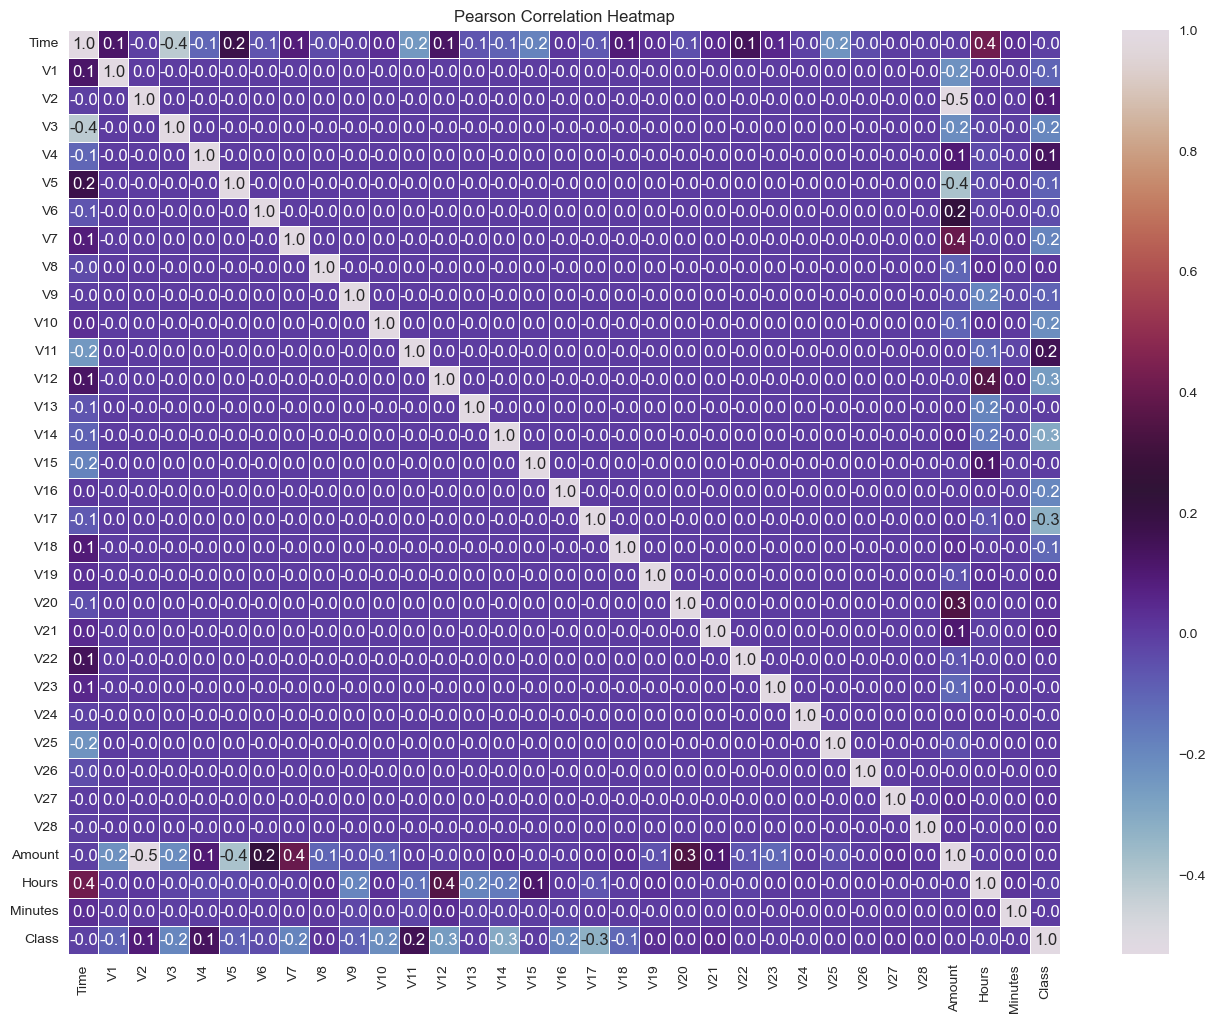

In [24]:
# Correlation {Pearson}==> Best for analyzing relationships between Amount, Time, and V1 to V28, Class
correlation_matrix=df.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", linewidths=0.5,cmap="twilight")
plt.title('Pearson Correlation Heatmap')
plt.show()

- We can conclude that feature v7,v20 have a significant dependence on Amount (positive)
- We can conclude that feature v2,v5,v3 have a significant dependence on Amount (negative)
- We can conclude that feature v3, have a significant dependence on Time(negative)
- We can conclude that feature v12,v14,v17 have a significant dependence on Class(neagtive) also there violin plot looks similiar
- The features[v1-v28] do have signigicant correlation between each other

### Checking the method that is best for removing skewness using the Amount Column

In [25]:
df1=df.copy()
df1['Amount Cbrt'] = np.cbrt(df1['Amount'])

df1['Amount Boxcox'], _ = boxcox(df1['Amount'] + 1)

pt = PowerTransformer(method='yeo-johnson')
df1['Amount Yeojohnson'] = pt.fit_transform(df1[['Amount']])

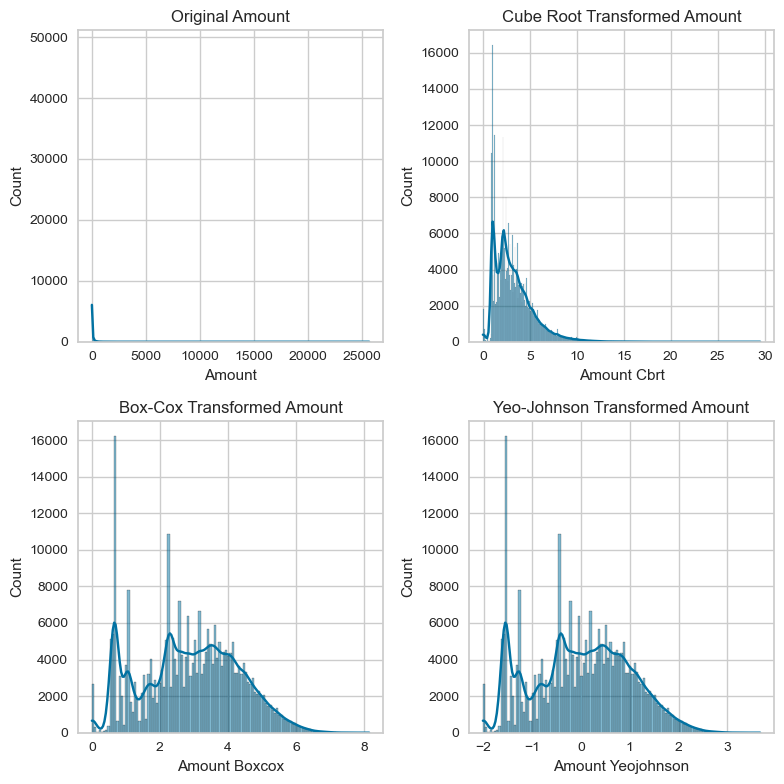

In [26]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
sns.histplot(df1['Amount'], ax=axes[0, 0], kde=True).set_title('Original Amount')
sns.histplot(df1['Amount Cbrt'], ax=axes[0, 1], kde=True).set_title('Cube Root Transformed Amount')
sns.histplot(df1['Amount Boxcox'], ax=axes[1, 0], kde=True).set_title('Box-Cox Transformed Amount')
sns.histplot(df1['Amount Yeojohnson'], ax=axes[1, 1], kde=True).set_title('Yeo-Johnson Transformed Amount')
plt.tight_layout()
plt.show()

#### Observation:
- The cube root transformation shows a more gradual decline, indicating an improvement in reducing extreme values.

- The Box-Cox transformation significantly alters the distribution, making it more symmetric and less skewed.This method is effective but requires the data to be strictly positive. 

- The Yeo-Johnson transformation is similar to the Box-Cox transformation but can handle zero and negative values as well. It produces a distribution that is more symmetric and less skewed and it is particularly useful for datasets that include zero or negative values.

- Both the Box-Cox and Yeo-Johnson transformations are the most effective in reducing skewness and creating a more symmetric distribution. The data contains zeros or negative values, Yeo-Johnson is preferable.

## Binary Classification - using Random Forest Classification

In [27]:
X = df.drop(columns=['Class'])
# Define features 
features = X.columns

In [28]:
Y = df['Class']

In [29]:
# Standardize the features to have mean 0 and variance 1
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [30]:
# Split the data into training (80%) and temporary (20%) sets
X_train, x_temp, Y_train, y_temp = train_test_split(X, Y, test_size=0.20, random_state=42)

# Split the temporary set into validation (10%) and test (10%) sets
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.50)

In [31]:
X_train.shape, x_test.shape, Y_train.shape, y_test.shape

((227845, 32), (28481, 32), (227845,), (28481,))

In [32]:
# Train a Random Forest model
model = RandomForestClassifier()
model.fit(X_train,Y_train)

RandomForestClassifier()

In [33]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [34]:
y_test.value_counts()

Class
0    28433
1       48
Name: count, dtype: int64

In [35]:
## Accuracy for the Ramdom Forest Model
accuracy_score(y_test,y_pred)

0.9995435553526912

### Feature Selection and Dealing with the skewness

In [36]:
continuous_vars = ['Amount', 'Time'] + [f'V{i}' for i in range(1, 29)] # Select the continuous variables to transform

# Function to check skewness
def check_skewness(df, variables):
    skewed_vars = {}
    for var in variables:
        skewness = df[var].skew()
        skewed_vars[var] = skewness
    return skewed_vars

pt = PowerTransformer(method='yeo-johnson')                     # Initialize the Yeo-Johnson transformer

df[continuous_vars] = pt.fit_transform(df[continuous_vars])    # Fit and transform the continuous variables

In [37]:
# 1. Point Biserial Correlation for continuous features
pointbiserial_results = []
continuous_vars = ['Amount', 'Time'] + [f'V{i}' for i in range(1, 29)]

# Function for finding the pointBiserial correlation between the features
for var in continuous_vars:
    correlation, _ = pointbiserialr(df['Class'], df[var])
    pointbiserial_results.append((var, correlation))

pointbiserial_df = pd.DataFrame(pointbiserial_results, columns=['Variable', 'Correlation'])
pointbiserial_df = pointbiserial_df.sort_values(by='Correlation', ascending=False)
print("Point Biserial Correlation Results:\n", pointbiserial_df.head(5))

Point Biserial Correlation Results:
    Variable  Correlation
12      V11     0.135500
3        V2     0.131334
5        V4     0.112175
9        V8     0.081357
20      V19     0.033706


In [38]:
# 2. Define the model to use for RFE, in this using logistic regression (faster processing)
LRmodel = LogisticRegression(max_iter=1000)
rfe = RFE(estimator=LRmodel, n_features_to_select=5, step=5)
fit = rfe.fit(X, Y)

selected_features = features[fit.support_] # Selecting features
print("RFE Selected Features:\n", selected_features)

RFE Selected Features:
 Index(['V4', 'V10', 'V13', 'V14', 'V22'], dtype='object')


In [39]:
# 3. Tree-based Feature Importance, selecting features according to the importance
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importances from Random Forest:\n", feature_importance_df.head(5))

Feature Importances from Random Forest:
    Feature  Importance
17     V17    0.167535
14     V14    0.127118
12     V12    0.103424
11     V11    0.071816
16     V16    0.066008


In [40]:
# Combine results of all the techniques for final selection
selected_features = set(pointbiserial_df['Variable'][:5]) | \
                    set(features[fit.support_]) | \
                    set(feature_importance_df['Feature'][:5])
selected_features=list(selected_features)
print("Final Selected Features:\n",selected_features )

Final Selected Features:
 ['V2', 'V11', 'V13', 'V12', 'V16', 'V22', 'V19', 'V4', 'V8', 'V17', 'V14', 'V10']


In [41]:
# Standardize the features to have mean 0 and variance 1
X = scaler.fit_transform(X)

In [42]:
# Split the data into training (80%) and temporary (20%) sets
X_train, x_temp, Y_train, y_temp = train_test_split(X, Y, test_size=0.20, random_state=42)

# Split the temporary set into validation (10%) and test (10%) sets
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.50)

In [43]:
# Train a Random Forest model
model = RandomForestClassifier()
model.fit(X_train,Y_train)

RandomForestClassifier()

In [44]:
y_pred = model.predict(x_test)

In [45]:
accuracy_score(y_test,y_pred)

0.9994382219725431

In [46]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28433
           1       0.94      0.71      0.81        48

    accuracy                           1.00     28481
   macro avg       0.97      0.85      0.90     28481
weighted avg       1.00      1.00      1.00     28481



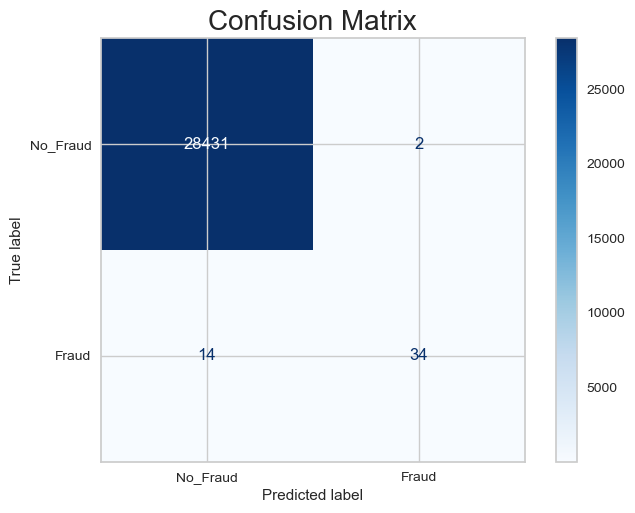

In [47]:
# Confusion Matrix 
#array([[TP, FP],
##      [FN, TN]]
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No_Fraud', 'Fraud'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix',size=20)
plt.show()

In [48]:
# Predict probabilities on the test set
y_prob = model.predict_proba(x_test)[:, 1]

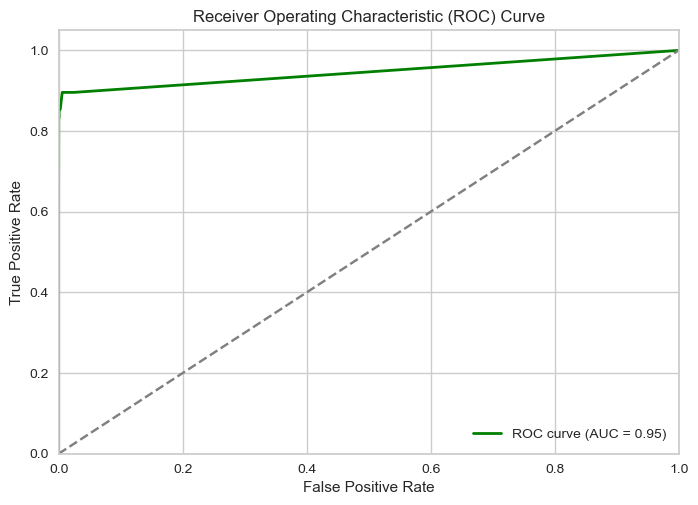

In [49]:
# ROC curve plot
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='green', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### Observation:
- The model is performing well with an AUC around 0.95, indicating that it is effective at distinguishing between fraudulent and non-fraudulent transactions.
- Model Selection: This curve and the AUC score suggest that the current model is suitable for the classification task

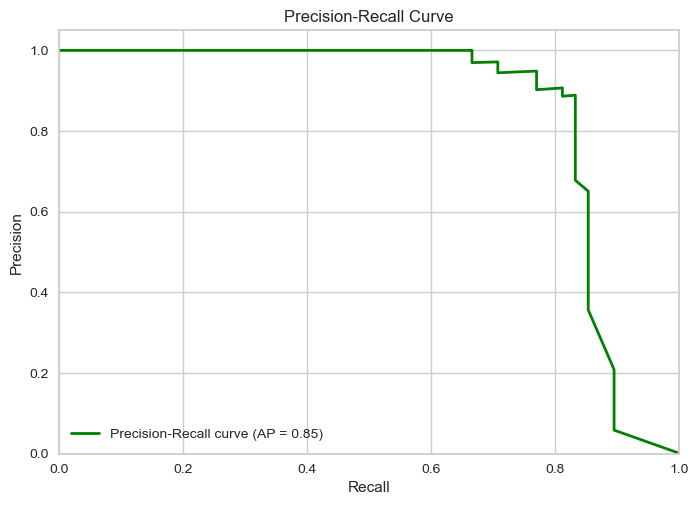

In [50]:
# Plot Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
average_precision = average_precision_score(y_test, y_prob)

plt.plot(recall, precision, color='green', lw=2, label='Precision-Recall curve (AP = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()

#### Observations:
- The area under the PR curve (around AP = 0.85) indicates the model's overall performance. 
- The model is quite good, especially for an imbalanced datasets

## Fine Tuning the Model- Hyperparameter Optimization

In [51]:
# Split the dataset into even smaller portion around 5%
X_small, _, Y_small, _ = train_test_split(X_train, Y_train, train_size=0.05, random_state=42)

In [52]:
# Define the hyperparameter space
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    model,
    param_distributions=param_dist,
    n_iter=100,  # Number of parameter settings sampled
    scoring='f1',  # Evaluation metric
    n_jobs=-1,  # Use all available cores
    cv=5,  # 5-fold cross-validation
)

In [53]:
# Fit RandomizedSearchCV
random_search.fit(X_small, Y_small)

# Best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}


In [54]:
best_rf = random_search.best_estimator_

In [55]:
# Evaluate the model
y_pred = best_rf.predict(x_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     28433
           1       0.89      0.50      0.64        48

    accuracy                           1.00     28481
   macro avg       0.94      0.75      0.82     28481
weighted avg       1.00      1.00      1.00     28481

Confusion Matrix:
 [[28430     3]
 [   24    24]]


In [56]:
# Cross-validation to check for overfitting
cv_scores = cross_val_score(best_rf, X_small, Y_small, cv=5, scoring='f1')
print("Mean Cross-validation F1 Score:", np.mean(cv_scores))

Mean Cross-validation F1 Score: 0.740952380952381


#### Observation:
- The mean cross-validation F1 score is an estimate of the model's performance on new, unseen data, that is around 70-80%

In [57]:
clf = setup(data=df, target='Class')

,Description,Value
0,Session id,8036
1,Target,Class
2,Target type,Binary
3,Original data shape,"(284807, 33)"
4,Transformed data shape,"(284807, 33)"
5,Transformed train set shape,"(199364, 33)"
6,Transformed test set shape,"(85443, 33)"
7,Numeric features,32
8,Preprocess,True
9,Imputation type,simple


In [58]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9996,0.9520,0.7938,0.9496,0.8643,0.8640,0.8678,33.8600
et,Extra Trees Classifier,0.9996,0.9489,0.7968,0.9563,0.8689,0.8687,0.8725,7.0300
lda,Linear Discriminant Analysis,0.9994,0.9450,0.7939,0.8355,0.8131,0.8128,0.8136,0.3990
knn,K Neighbors Classifier,0.9993,0.9112,0.7034,0.8895,0.7840,0.7837,0.7899,11.1850
lr,Logistic Regression,0.9992,0.9744,0.6162,0.8680,0.7176,0.7172,0.7293,1.3840
svm,SVM - Linear Kernel,0.9992,0.9691,0.6748,0.8442,0.7429,0.7426,0.7508,0.3160
dt,Decision Tree Classifier,0.9991,0.8792,0.7589,0.7558,0.7541,0.7537,0.7553,3.3390
ada,Ada Boost Classifier,0.9991,0.9734,0.7122,0.7764,0.7405,0.7400,0.7419,15.3360
gbc,Gradient Boosting Classifier,0.9990,0.6952,0.5342,0.7853,0.6191,0.6186,0.6378,72.1130
ridge,Ridge Classifier,0.9988,0.9450,0.4041,0.8047,0.5361,0.5355,0.5686,0.2440


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=8036, verbose=0,
                       warm_start=False)